In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read data

In [ ]:
data=pd.read_csv('drive/MyDrive/immo_data.csv',lineterminator='\n')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
serviceCharge,261941.0,151.206113,308.295790,0.0000,95.0000,135.0000,190.0000,1.461180e+05
telekomHybridUploadSpeed,45020.0,10.000000,0.000000,10.0000,10.0000,10.0000,10.0000,1.000000e+01
telekomUploadSpeed,235492.0,28.804928,16.337151,1.0000,10.0000,40.0000,40.0000,1.000000e+02
totalRent,228333.0,901.331522,33238.333822,0.0000,469.8000,650.0000,985.0000,1.575154e+07
yearConstructed,211805.0,1966.400590,46.992207,1000.0000,1950.0000,1973.0000,1996.0000,2.090000e+03
noParkSpaces,93052.0,1.327634,8.361403,0.0000,1.0000,1.0000,1.0000,2.241000e+03
livingSpace,268850.0,74.355548,254.759208,0.0000,54.0000,67.3200,87.0000,1.111110e+05
postcode,268850.0,37283.022235,27798.037296,852.0000,9128.0000,38667.0000,57072.0000,9.999800e+04
noRooms,268850.0,2.641261,2.633440,1.0000,2.0000,3.0000,3.0000,9.999900e+02
floor,217541.0,2.122405,3.634934,-1.0000,1.0000,2.0000,3.0000,9.990000e+02


In [ ]:
data.shape

(268850, 36)

## Drop `facilities` and `description` since our base for uniquness in this phase are units themselves

In [ ]:
handy_data=data.copy()
handy_data.drop('facilities', axis=1, inplace=True)
handy_data.drop('description', axis=1, inplace=True)
handy_data = handy_data.drop_duplicates()
handy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
serviceCharge,257797.0,151.368668,310.509964,0.0000,95.0000,135.0000,190.0000,1.461180e+05
telekomHybridUploadSpeed,44426.0,10.000000,0.000000,10.0000,10.0000,10.0000,10.0000,1.000000e+01
telekomUploadSpeed,231857.0,28.764944,16.351674,1.0000,10.0000,40.0000,40.0000,1.000000e+02
totalRent,224844.0,902.843601,33495.140669,0.0000,470.0000,650.0000,985.0000,1.575154e+07
yearConstructed,208382.0,1966.359062,47.030862,1000.0000,1950.0000,1972.0000,1996.0000,2.090000e+03
noParkSpaces,91898.0,1.328549,8.409125,0.0000,1.0000,1.0000,1.0000,2.241000e+03
livingSpace,264595.0,74.401779,256.763243,0.0000,54.0000,67.4200,87.0000,1.111110e+05
postcode,264595.0,37419.232159,27801.813522,852.0000,9130.0000,38820.0000,57223.0000,9.999800e+04
noRooms,264595.0,2.642578,2.651553,1.0000,2.0000,3.0000,3.0000,9.999900e+02
floor,214212.0,2.119195,3.657124,-1.0000,1.0000,2.0000,3.0000,9.990000e+02


In [ ]:
handy_data.shape # 4255 duplicates!

(264595, 34)

## Separating categorical data and numerical data

 ### categorical data

In [ ]:
# get a datafram only with the categorical variables
df_cat_cols = handy_data.select_dtypes(include=['object']).copy()
df_cat_cols

,regionLevel1,heatingType,telekomTvOffer,firingTypes,houseNumber,condition,interiorQuality,petsAllowed,street,typeOfFlat,regionLevel2,regionLevel3,energyEfficiencyClass
0,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,oil,244,well_kept,normal,NaN,Schüruferstraße,ground_floor,Dortmund,Schüren,NaN
1,Rheinland_Pfalz,self_contained_central_heating,ONE_YEAR_FREE,gas,NaN,refurbished,normal,no,NaN,ground_floor,Rhein_Pfalz_Kreis,Böhl_Iggelheim,NaN
2,Sachsen,floor_heating,ONE_YEAR_FREE,NaN,4,first_time_use,sophisticated,NaN,Turnerweg,apartment,Dresden,Äußere_Neustadt_Antonstadt,NaN
3,Sachsen,district_heating,ONE_YEAR_FREE,district_heating,35,NaN,NaN,NaN,Glück-Auf-Straße,other,Mittelsachsen_Kreis,Freiberg,NaN
4,Bremen,self_contained_central_heating,NaN,gas,10,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,apartment,Bremen,Neu_Schwachhausen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,heat_pump,ONE_YEAR_FREE,geothermal,NaN,mint_condition,sophisticated,no,NaN,roof_storey,Weilheim_Schongau_Kreis,Eberfing,NaN
268846,Hessen,gas_heating,NaN,gas,NaN,well_kept,sophisticated,negotiable,NaN,apartment,Bergstraße_Kreis,Viernheim,NaN
268847,Hessen,central_heating,ONE_YEAR_FREE,gas,10,well_kept,NaN,negotiable,Emsbachstrasse,apartment,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,NaN
268848,Nordrhein_Westfalen,heat_pump,NaN,gas,58,first_time_use,sophisticated,no,Idastraße,apartment,Köln,Dellbrück,NO_INFORMATION


In [ ]:
# Get the unique values of each variable 
for col in df_cat_cols.columns:
    print('{}\n'.format(col))
    print('{}\n'.format(df_cat_cols[col].value_counts()))

regionLevel1

Nordrhein_Westfalen       62082
Sachsen                   56652
Bayern                    21440
Sachsen_Anhalt            19724
Hessen                    17546
Niedersachsen             16470
Baden_Württemberg         15895
Berlin                    10203
Rheinland_Pfalz            8284
Thüringen                  8247
Brandenburg                6845
Schleswig_Holstein         6609
Mecklenburg_Vorpommern     6555
Hamburg                    3706
Bremen                     2925
Saarland                   1412
Name: regionLevel1, dtype: int64

heatingType

central_heating                   126890
district_heating                   24294
gas_heating                        19729
self_contained_central_heating     18889
floor_heating                      17419
oil_heating                         5029
heat_pump                           2709
combined_heat_and_power_plant       1964
night_storage_heater                1324
wood_pellet_heating                  958
electric_heating 

### Numerical data

In [ ]:
list_num_cols = handy_data.select_dtypes(include=['float', 'int']).columns
list_num_cols

Index(['serviceCharge', 'telekomHybridUploadSpeed', 'telekomUploadSpeed',
       'totalRent', 'yearConstructed', 'noParkSpaces', 'livingSpace',
       'postcode', 'noRooms', 'floor', 'numberOfFloors', 'heatingCosts',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice'],
      dtype='object')

#### Numerical utilities

In [ ]:
def create_rel_diff_df(df, list_num_cols):
  rel_diff_outl = []
  for col in list_num_cols:
      percentile = np.nanpercentile(df[col], 99) # get the 99 percentile
      max_var = df[col].max() # get the max value of the variable
      rel_diff = max_var / percentile # get the relative difference between both values
      rel_diff_outl.append(rel_diff) # append the value to the list

  # create a dataframe with the results combined
  outl_detection = {
      'variable': list(list_num_cols),
      'relative_diff': rel_diff_outl
  }

  rel_diff_df = pd.DataFrame(data=outl_detection)

  # show dataframe
  return rel_diff_df.sort_values('relative_diff', ascending=False)


In [ ]:
def get_rid_outl(df, list_num_cols, percentile):    
    perc_dict = {}
    for col in list_num_cols: # first, calculate all the percentiles before removing any
        # row, otherwise you will remove more rows than necessary
        value_perc = np.nanpercentile(df[col], percentile)
        value_perc_dict = {col: value_perc}
        perc_dict.update(value_perc_dict)
        
    for var in list_num_cols:    
        df = df.loc[(df[var] <= perc_dict[var]) ^ (df[var].isnull())] # include nan values
    
    return df

### Removing outliers

In [ ]:
rel_diff_df = create_rel_diff_df(handy_data, list_num_cols)
rel_diff_df

,variable,relative_diff
3,totalRent,5526.854386
6,livingSpace,617.283333
5,noParkSpaces,560.250000
0,serviceCharge,332.086364
8,noRooms,199.998000
9,floor,124.875000
10,numberOfFloors,90.818182
11,heatingCosts,63.065000
2,telekomUploadSpeed,2.500000
12,lastRefurbish,1.445050


In [ ]:
outls = ['totalRent',
        'livingSpace',
         'noParkSpaces',
        'serviceCharge',
        'noRooms',
        'floor',
        'numberOfFloors',
        'heatingCosts']
handy_data = get_rid_outl(handy_data, outls, 99)

totalRent drawed
livingSpace drawed
noParkSpaces drawed
serviceCharge drawed
noRooms drawed
floor drawed
numberOfFloors drawed
heatingCosts drawed


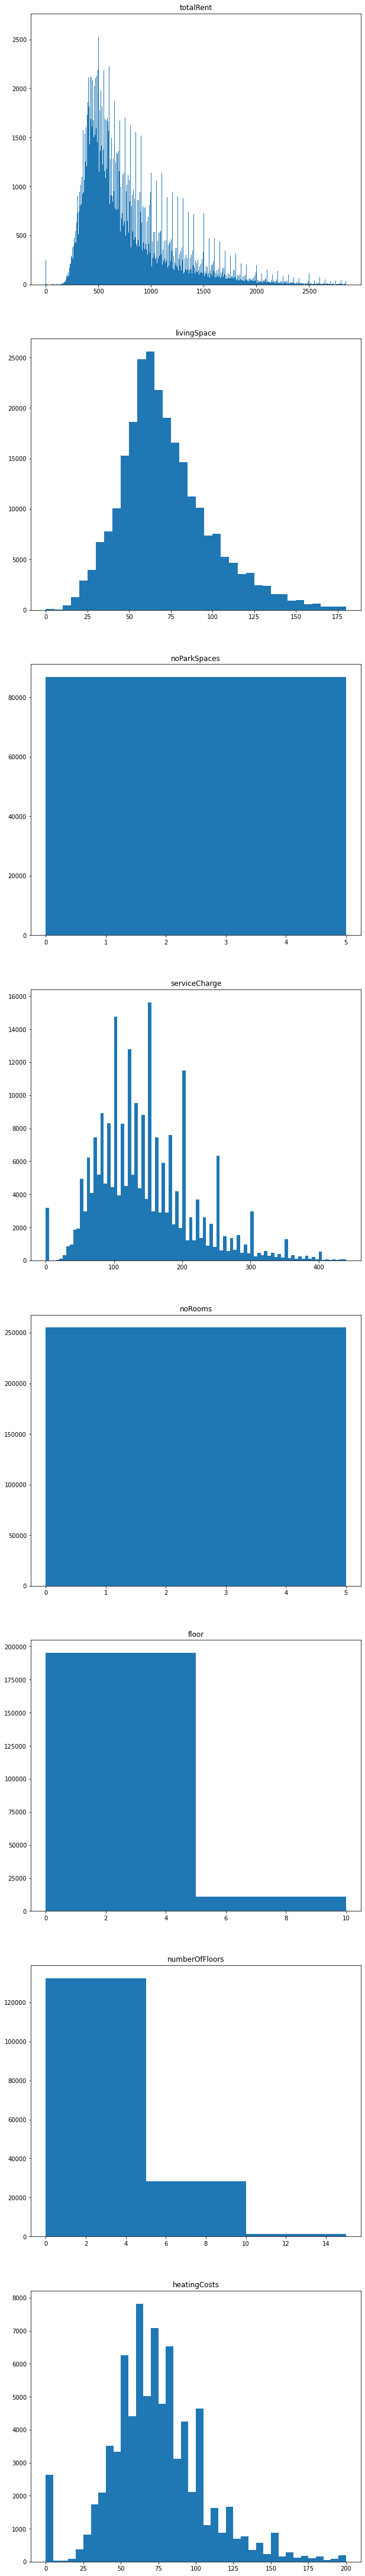

In [ ]:
# get a better understanding of the numerical columns after removing outliers
plt.figure(figsize=[10,150])
for index, col in enumerate(outls):
  bin_edges = np.arange(0, handy_data[col].max()+5, 5)

  plt.subplot(len(list_num_cols),1,(index + 1))
  plt.hist(data=handy_data, x=col, bins=bin_edges)
  plt.title(col)
  print(f"{col} drawed")

In [ ]:
handy_data.shape

(255048, 34)

## Removing unwanted columns

In [ ]:
handy_data.isna().sum()


regionLevel1                     0
serviceCharge                 6456
heatingType                  42399
telekomTvOffer               30613
telekomHybridUploadSpeed    212146
newlyConst                       0
balcony                          0
telekomUploadSpeed           31320
totalRent                    38277
yearConstructed              54570
noParkSpaces                168183
firingTypes                  53892
kitchen                          0
cellar                           0
houseNumber                  66404
livingSpace                      0
condition                    65404
interiorQuality             107215
petsAllowed                 108291
street                       66399
lift                             0
typeOfFlat                   34715
postcode                         0
noRooms                          0
floor                        48653
numberOfFloors               93161
garden                           0
regionLevel2                     0
regionLevel3        

In [ ]:
# create a list of all the columns to be dropped
unwanted_col = [
                'telekomTvOffer',
                'telekomHybridUploadSpeed', 
                'telekomUploadSpeed', 
                'firingTypes', 
                'houseNumber', # too much details
                'street', # too much details
                'electricityKwhPrice', # too many nulls
                'electricityBasePrice' # too many nulls
                ]

In [ ]:
handy_data.drop(columns=unwanted_col, inplace=True)


In [ ]:
handy_data.shape

(255048, 26)

## Dealing with COSTS [Total rent, Service charge, HeatingCosts]

In [ ]:
# how many NaN values has total and service Charge
print(handy_data.totalRent.isnull().sum())
print(handy_data.serviceCharge.isnull().sum())

38277
6456


In [ ]:
# number of zeros in the two variables
print(handy_data[handy_data.totalRent == 0]['totalRent'].shape[0])
print(handy_data[handy_data.serviceCharge == 0]['serviceCharge'].shape[0])

226
3127


In [ ]:
# change all NaNs in total rent and service Charge to zeros
handy_data.totalRent.fillna(0, inplace=True)
handy_data.serviceCharge.fillna(0, inplace=True)

In [ ]:
# number of zeros after replacement of NaNs 
print(handy_data[handy_data.totalRent == 0]['totalRent'].shape[0])
print(handy_data[handy_data.serviceCharge == 0]['totalRent'].shape[0])

38503
9583


## Delete zero total rents!

In [ ]:
handy_data.reset_index()
# get the index of all rows to be removed
rows_to_delete_list = list(handy_data[(handy_data.totalRent == 0)].index)
print(len(rows_to_delete_list))


38503


In [ ]:
handy_data = handy_data.drop(index=rows_to_delete_list)
handy_data.shape

(216545, 26)

In [ ]:
handy_data[['totalRent', 'heatingCosts', 'serviceCharge']]

,totalRent,heatingCosts,serviceCharge
0,840.00,NaN,245.0
2,1300.00,NaN,255.0
4,903.00,NaN,138.0
6,380.00,NaN,70.0
7,584.25,44.0,88.0
...,...,...,...
268844,670.00,NaN,80.0
268845,910.00,NaN,90.0
268846,1150.00,NaN,220.0
268847,930.00,NaN,220.0


## [Nebenkosten](https://de.wikipedia.org/wiki/Nebenkosten) 
In Germany usually, the heating costs are included in the service Charge.
It is assumed that, people who did not include a service charge and heating costs in the formular, meant to say that heating costs are part of the serving charge. And the other way around

In [ ]:
# are there rows where the heating costs are higher than the service charge?
handy_data[handy_data.heatingCosts > handy_data.serviceCharge][['heatingCosts', 'serviceCharge', 'totalRent']].sample(20)
# Giving the results above it is very likely that if the heating costs are higher than the service charge, these (the heating costs) have to be added to the total rent


,heatingCosts,serviceCharge,totalRent
175337,119.00,66.00,502.00
236436,100.00,70.00,470.00
222141,119.00,50.00,431.00
218520,79.00,59.00,440.00
61735,90.00,71.00,441.00
191775,65.00,63.50,384.00
14505,70.00,59.00,428.00
152689,160.00,110.00,1020.00
133754,120.00,60.00,680.00
245714,130.00,100.00,830.00


In [ ]:
handy_data.heatingCosts.fillna(0, inplace=True)

In [ ]:
# set a function that follows the logic above

def heating_costs(heating_costs, service_charge, total_rent):
    if heating_costs > service_charge:
        return total_rent + heating_costs
    else:
        return total_rent

In [ ]:
# get a column with the total rent including the heating costs

handy_data['rent_incl_hc'] = handy_data.apply(lambda x: heating_costs(x['heatingCosts'],
                                                                  x['serviceCharge'],
                                                                  x['totalRent']), axis = 1)

## Solving the NaN values of the nummerical variables

In [ ]:
list_num_cols = list(handy_data.select_dtypes(include=['float', 'int']).columns)


In [ ]:
handy_data[list_num_cols].isnull().sum()


serviceCharge           0
totalRent               0
yearConstructed     47289
noParkSpaces       144087
livingSpace             0
postcode                0
noRooms                 0
floor               38353
numberOfFloors      75670
heatingCosts            0
lastRefurbish      147805
rent_incl_hc            0
dtype: int64

In [ ]:
handy_data.floor.value_counts()


 1.0    52899
 2.0    47387
 3.0    31494
 0.0    20259
 4.0    16514
 5.0     6380
 6.0     1810
 7.0      767
 8.0      426
-1.0      256
Name: floor, dtype: int64

## yearConstructed and lastRefurbish

In [ ]:
# how many entries have a construction or las refurbish year above 2022 - 
# by definition not possible
print(handy_data[handy_data.yearConstructed > 2022].shape[0])
print(handy_data[handy_data.lastRefurbish > 2022].shape[0])

4
6


In [ ]:
# change all NaNs to zeros
handy_data.yearConstructed.fillna(0, inplace=True)
handy_data.lastRefurbish.fillna(0, inplace=True)

In [ ]:
handy_data = handy_data[(handy_data.yearConstructed <= 2020) & (handy_data.lastRefurbish <= 2020)]
handy_data

,regionLevel1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,kitchen,cellar,...,noRooms,floor,numberOfFloors,garden,regionLevel2,regionLevel3,heatingCosts,energyEfficiencyClass,lastRefurbish,rent_incl_hc
0,Nordrhein_Westfalen,245.0,central_heating,False,False,840.00,1965.0,1.0,False,True,...,4.0,1.0,3.0,True,Dortmund,Schüren,0.0,NaN,0.0,840.00
2,Sachsen,255.0,floor_heating,True,True,1300.00,2019.0,1.0,False,True,...,3.0,3.0,4.0,False,Dresden,Äußere_Neustadt_Antonstadt,0.0,NaN,0.0,1300.00
4,Bremen,138.0,self_contained_central_heating,False,True,903.00,1950.0,NaN,False,False,...,3.0,1.0,NaN,False,Bremen,Neu_Schwachhausen,0.0,NaN,0.0,903.00
6,Sachsen,70.0,self_contained_central_heating,False,False,380.00,0.0,NaN,False,True,...,2.0,1.0,4.0,True,Mittelsachsen_Kreis,Freiberg,0.0,NaN,0.0,380.00
7,Bremen,88.0,central_heating,False,True,584.25,1959.0,NaN,False,True,...,3.0,NaN,NaN,False,Bremen,St._Magnus,44.0,B,0.0,584.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,Nordrhein_Westfalen,80.0,gas_heating,False,False,670.00,0.0,NaN,False,False,...,3.0,3.0,3.0,False,Essen,Horst,0.0,NaN,2019.0,670.00
268845,Bayern,90.0,heat_pump,False,True,910.00,2016.0,1.0,False,True,...,3.0,NaN,NaN,False,Weilheim_Schongau_Kreis,Eberfing,0.0,NaN,0.0,910.00
268846,Hessen,220.0,gas_heating,False,True,1150.00,1983.0,1.0,True,False,...,3.5,1.0,1.0,False,Bergstraße_Kreis,Viernheim,0.0,NaN,2015.0,1150.00
268847,Hessen,220.0,central_heating,False,True,930.00,1965.0,1.0,False,True,...,4.0,1.0,2.0,True,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,0.0,NaN,2019.0,930.00


In [ ]:
handy_data.shape

(216521, 27)

In [ ]:
# to create a string without any decimal, I first transform it to integer. 
handy_data.yearConstructed = handy_data.yearConstructed.astype(int).astype(str)
handy_data.lastRefurbish = handy_data.lastRefurbish.astype(int).astype(str)

In [ ]:
# Replace all '0' for 'NO_INFORMATION'
handy_data['yearConstructed'] = handy_data['yearConstructed'].replace('0', 'NO_INFORMATION')
handy_data['lastRefurbish'] = handy_data['lastRefurbish'].replace('0', 'NO_INFORMATION')

In [ ]:
yearRef_order = list(handy_data.yearConstructed.value_counts().sort_index().index)
ordered_yearRef = pd.api.types.CategoricalDtype(ordered=True, categories=yearRef_order)
handy_data.lastRefurbish = handy_data.lastRefurbish.astype(ordered_yearRef)

In [ ]:
handy_data[handy_data['yearConstructed'] > '1800']['yearConstructed'].value_counts().sort_index()


1803                  3
1805                  3
1806                  2
1808                  4
1810                 12
                  ...  
2017               2995
2018               6500
2019               8395
2020               1674
NO_INFORMATION    47287
Name: yearConstructed, Length: 211, dtype: int64

In [ ]:
yearCon_order = list(handy_data.yearConstructed.value_counts().sort_index().index)
ordered_yearCon = pd.api.types.CategoricalDtype(ordered=True, categories=yearCon_order)
handy_data.yearConstructed = handy_data.yearConstructed.astype(ordered_yearCon)



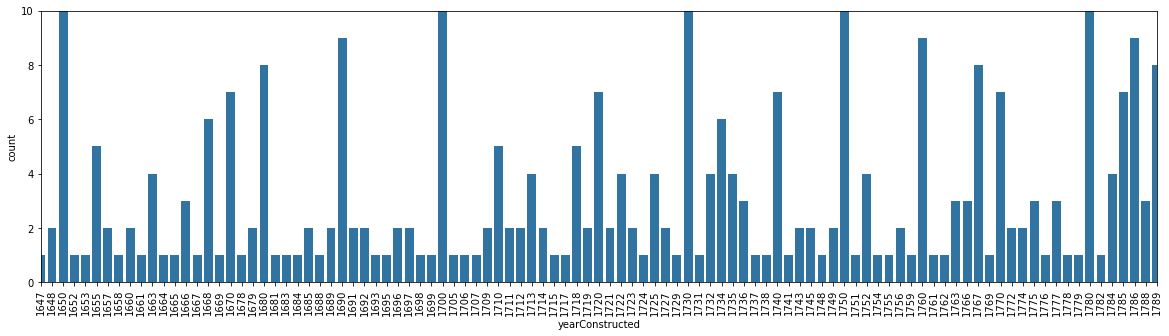

In [ ]:
# test the changes worked
base_color = sns.color_palette()[0]
plt.figure(figsize=[20,5])
sns.countplot(data=handy_data, x='yearConstructed', color=base_color)
plt.xticks(rotation=90)
plt.xlim((100, 200))
plt.ylim((0,10));

##  noParkSpaces

In [ ]:
handy_data['noParkSpaces']

0         1.0
2         1.0
4         NaN
6         NaN
7         NaN
         ... 
268844    NaN
268845    1.0
268846    1.0
268847    1.0
268848    1.0
Name: noParkSpaces, Length: 216521, dtype: float64

In [ ]:
handy_data['noParkSpaces'].fillna(0, inplace=True)


In [ ]:
handy_data.noParkSpaces.value_counts()


0.0    147151
1.0     62731
2.0      6319
3.0       236
4.0        84
Name: noParkSpaces, dtype: int64

## floor and numberOfFloors

Floor and number of floors are categorical variables since they mean in which floor is the flat. There is no way we can impute it, as the floor has also an impact on the price. Most of the time, ground floors and top floors are cheaper than any other. Therefore I prefer to specify a no_information to keep track of the NaNs.

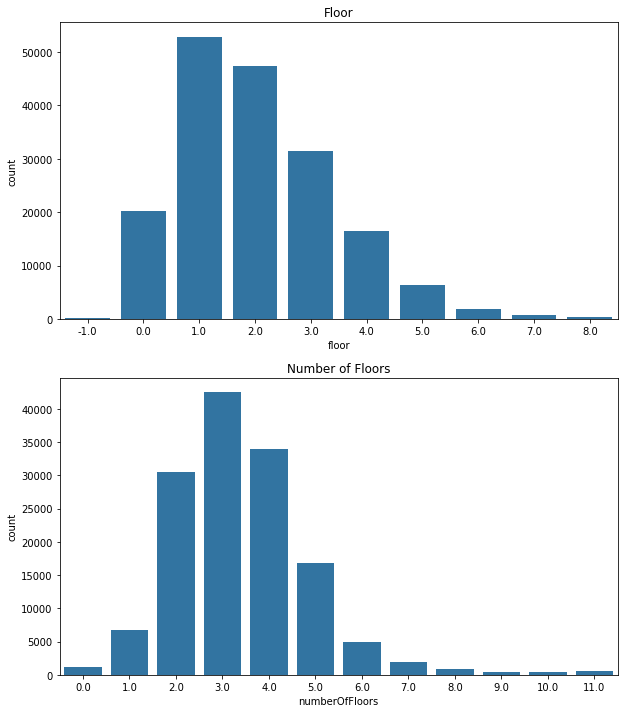

In [ ]:
# let us take a look at the distribution of both variables 
plt.figure(figsize=[10,12])

bin_edges = np.arange(0, 20, 0.5)

plt.subplot(2,1,1)
sns.countplot(data=handy_data, x='floor', color=base_color)
plt.title('Floor')

plt.subplot(2,1,2)
sns.countplot(data=handy_data, x='numberOfFloors', color=base_color)
plt.title('Number of Floors');

In [ ]:
# change the data type
handy_data.floor = handy_data.floor.astype(str)
handy_data.numberOfFloors = handy_data.numberOfFloors.astype(str)

In [ ]:
# replace all nans for NO_INFORMATION
handy_data.floor = handy_data.floor.replace('nan', 'NO_INFORMATION')
handy_data.numberOfFloors = handy_data.numberOfFloors.replace('nan', 'NO_INFORMATION')

## finalize

In [ ]:
# check again there is no more nan values
list_num_vars = list(handy_data.select_dtypes(include=['float', 'int']).columns)
handy_data[list_num_vars].isnull().sum()

serviceCharge    0
totalRent        0
noParkSpaces     0
livingSpace      0
postcode         0
noRooms          0
heatingCosts     0
rent_incl_hc     0
dtype: int64

In [ ]:
handy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216521 entries, 0 to 268848
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   regionLevel1           216521 non-null  object  
 1   serviceCharge          216521 non-null  float64 
 2   heatingType            181720 non-null  object  
 3   newlyConst             216521 non-null  bool    
 4   balcony                216521 non-null  bool    
 5   totalRent              216521 non-null  float64 
 6   yearConstructed        216521 non-null  category
 7   noParkSpaces           216521 non-null  float64 
 8   kitchen                216521 non-null  bool    
 9   cellar                 216521 non-null  bool    
 10  livingSpace            216521 non-null  float64 
 11  condition              162177 non-null  object  
 12  interiorQuality        132026 non-null  object  
 13  petsAllowed            126462 non-null  object  
 14  lift                

In [ ]:
handy_data.shape

(216521, 27)

# Exploring and visualization


In [ ]:
df = handy_data.copy()

In [ ]:
# I will also rename the response variable to rent
df.rename(columns={'rent_incl_hc': 'rent'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


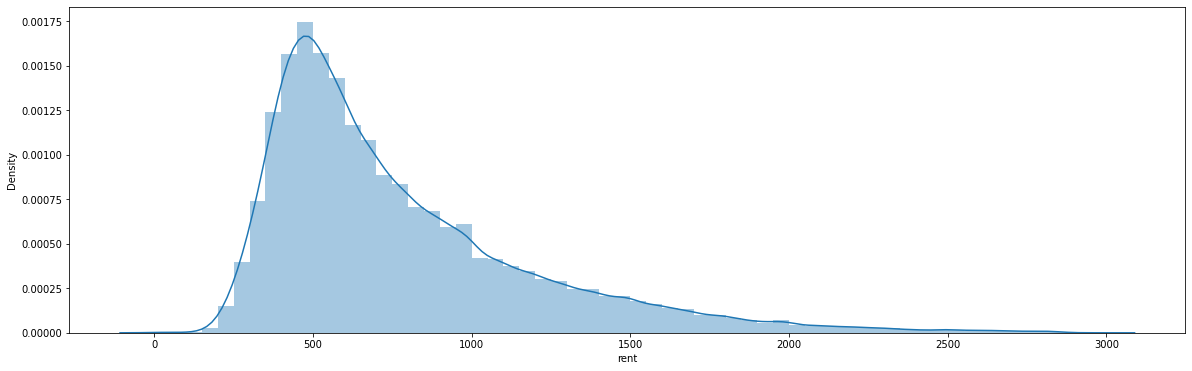

In [ ]:
# distribution of the response variable
base_color = sns.color_palette()[0]

bin_edges = np.arange(0, df['rent'].max()+50, 50)

plt.figure(figsize=[20,6])
sns.distplot(df['rent'], bins=bin_edges);


## price per squared meter

In [ ]:
# remove all rows where living space is 0
df = df[df['livingSpace'] != 0] # 45 zeros
df

,regionLevel1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,kitchen,cellar,...,noRooms,floor,numberOfFloors,garden,regionLevel2,regionLevel3,heatingCosts,energyEfficiencyClass,lastRefurbish,rent
0,Nordrhein_Westfalen,245.0,central_heating,False,False,840.00,1965,1.0,False,True,...,4.0,1.0,3.0,True,Dortmund,Schüren,0.0,NaN,NO_INFORMATION,840.00
2,Sachsen,255.0,floor_heating,True,True,1300.00,2019,1.0,False,True,...,3.0,3.0,4.0,False,Dresden,Äußere_Neustadt_Antonstadt,0.0,NaN,NO_INFORMATION,1300.00
4,Bremen,138.0,self_contained_central_heating,False,True,903.00,1950,0.0,False,False,...,3.0,1.0,NO_INFORMATION,False,Bremen,Neu_Schwachhausen,0.0,NaN,NO_INFORMATION,903.00
6,Sachsen,70.0,self_contained_central_heating,False,False,380.00,NO_INFORMATION,0.0,False,True,...,2.0,1.0,4.0,True,Mittelsachsen_Kreis,Freiberg,0.0,NaN,NO_INFORMATION,380.00
7,Bremen,88.0,central_heating,False,True,584.25,1959,0.0,False,True,...,3.0,NO_INFORMATION,NO_INFORMATION,False,Bremen,St._Magnus,44.0,B,NO_INFORMATION,584.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,Nordrhein_Westfalen,80.0,gas_heating,False,False,670.00,NO_INFORMATION,0.0,False,False,...,3.0,3.0,3.0,False,Essen,Horst,0.0,NaN,2019,670.00
268845,Bayern,90.0,heat_pump,False,True,910.00,2016,1.0,False,True,...,3.0,NO_INFORMATION,NO_INFORMATION,False,Weilheim_Schongau_Kreis,Eberfing,0.0,NaN,NO_INFORMATION,910.00
268846,Hessen,220.0,gas_heating,False,True,1150.00,1983,1.0,True,False,...,3.5,1.0,1.0,False,Bergstraße_Kreis,Viernheim,0.0,NaN,2015,1150.00
268847,Hessen,220.0,central_heating,False,True,930.00,1965,1.0,False,True,...,4.0,1.0,2.0,True,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,0.0,NaN,2019,930.00


In [ ]:
# create a new variable for the rent/livingSpace (rent/m2)
df['rent_m2'] = df['rent'] / df['livingSpace']
df['rent_m2'].max()

1280.0

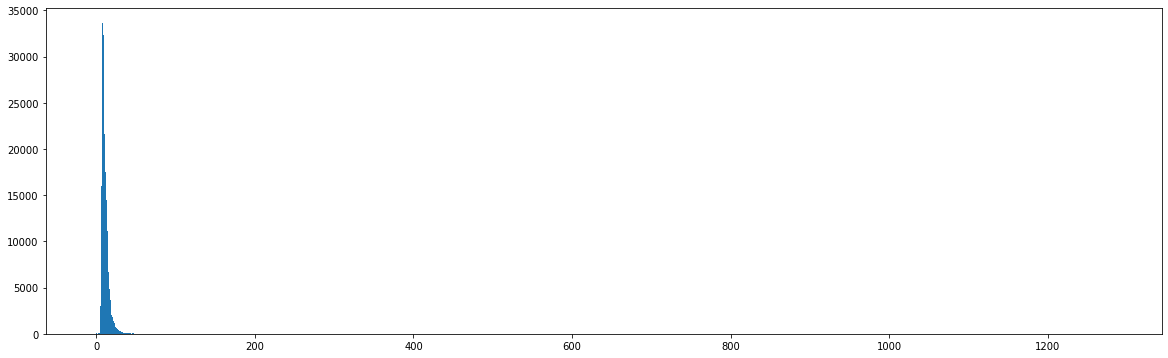

In [ ]:
# distribution of the price per squared meter
bin_edges = np.arange(0, df['rent_m2'].max()+1, 1)

plt.figure(figsize=[20,6])
plt.hist(data=df, x='rent_m2', bins=bin_edges);

In [ ]:
# The price per squared meter is clearly biased! Iterate over the data preparation process to correct this issue. 
# I will start by checking the amount of biased data:
for i in np.arange(98, 100, 0.1):
    print('{}: {}'.format(i, np.percentile(df.rent_m2, i)))



98.0: 25.429802955665025
98.1: 25.757575757575758
98.19999999999999: 26.166666666666668
98.29999999999998: 26.59090909090909
98.39999999999998: 27.0
98.49999999999997: 27.5
98.59999999999997: 27.94594017093982
98.69999999999996: 28.40909090909091
98.79999999999995: 28.942183787892855
98.89999999999995: 29.623558240969437
98.99999999999994: 30.315290329760078
99.09999999999994: 31.01123595505618
99.19999999999993: 31.89312669643631
99.29999999999993: 32.94338235294066
99.39999999999992: 34.0
99.49999999999991: 35.625
99.59999999999991: 37.5
99.6999999999999: 40.0
99.7999999999999: 44.44652222221327
99.89999999999989: 51.491203703699284


In [ ]:
# I am going to keep the 99% of the data and get rid of the outlier. 
df = get_rid_outl(df, ['rent_m2'], 99)

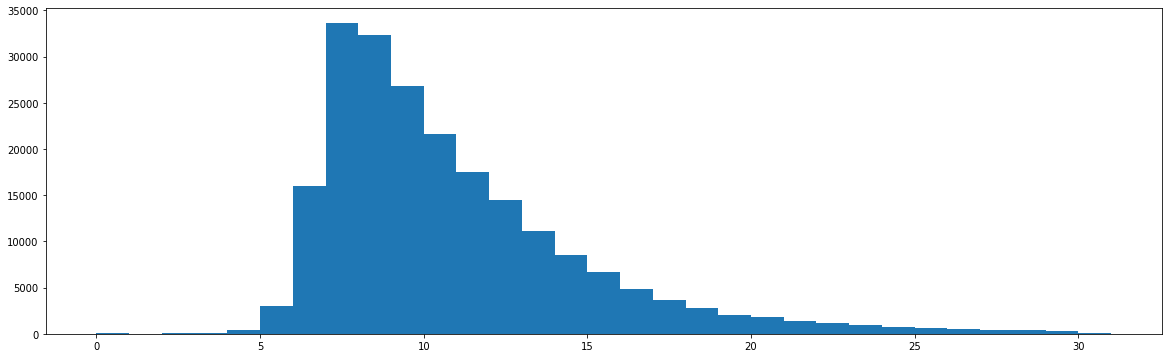

In [ ]:
# look at the distribution of the price per squared meter again
bin_edges = np.arange(0, df['rent_m2'].max()+1, 1)

plt.figure(figsize=[20,6])
plt.hist(data=df, x='rent_m2', bins=bin_edges);

In [ ]:
df.columns


Index(['regionLevel1', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'totalRent', 'yearConstructed', 'noParkSpaces', 'kitchen', 'cellar',
       'livingSpace', 'condition', 'interiorQuality', 'petsAllowed', 'lift',
       'typeOfFlat', 'postcode', 'noRooms', 'floor', 'numberOfFloors',
       'garden', 'regionLevel2', 'regionLevel3', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'rent', 'rent_m2'],
      dtype='object')

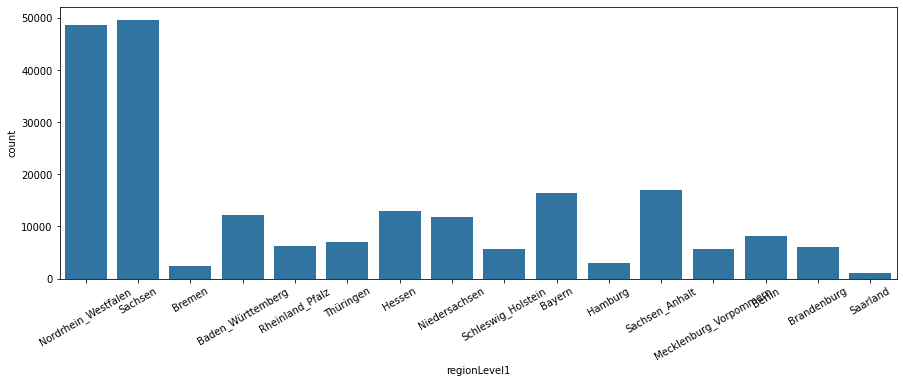

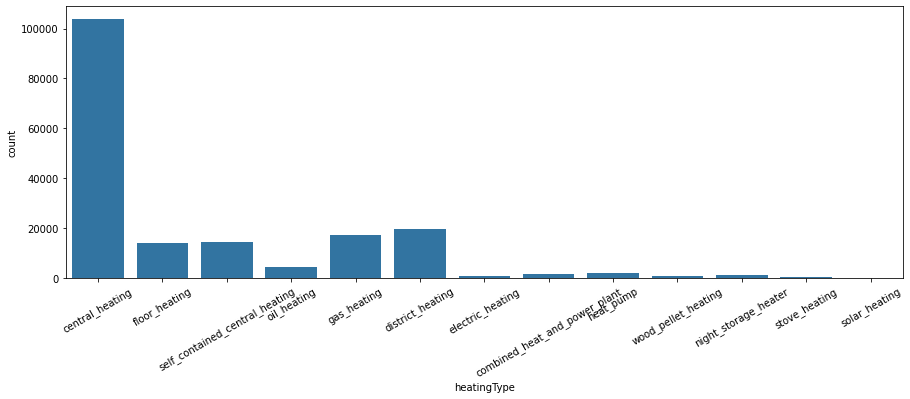

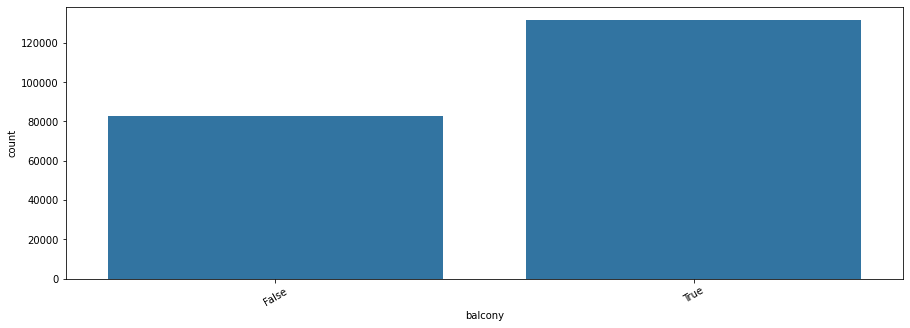

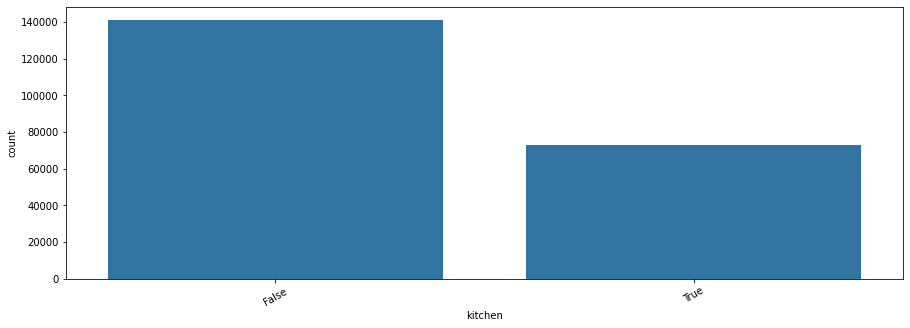

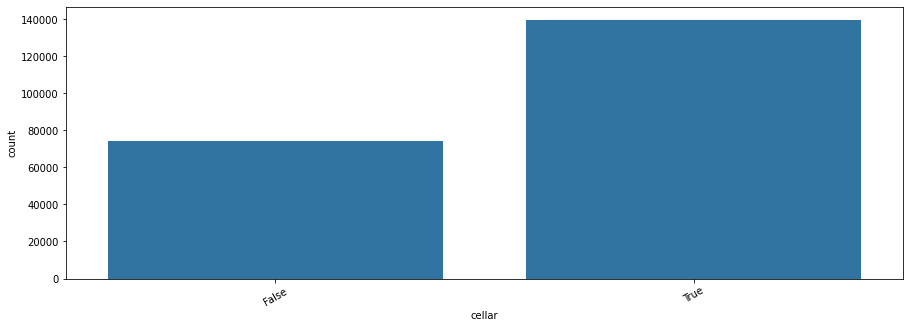

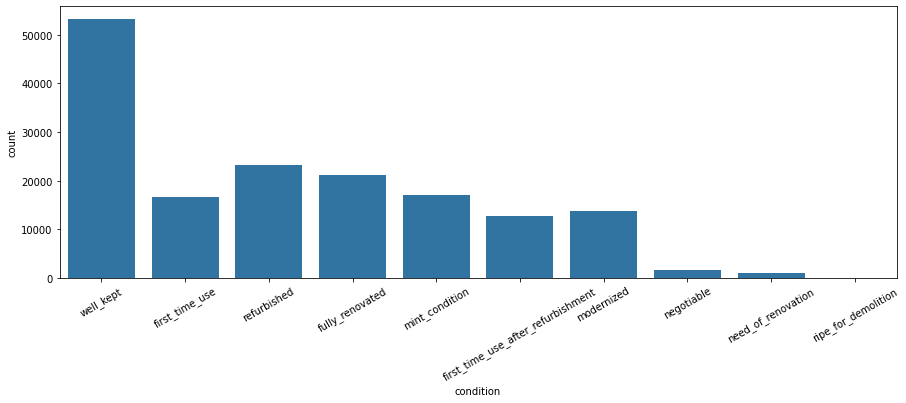

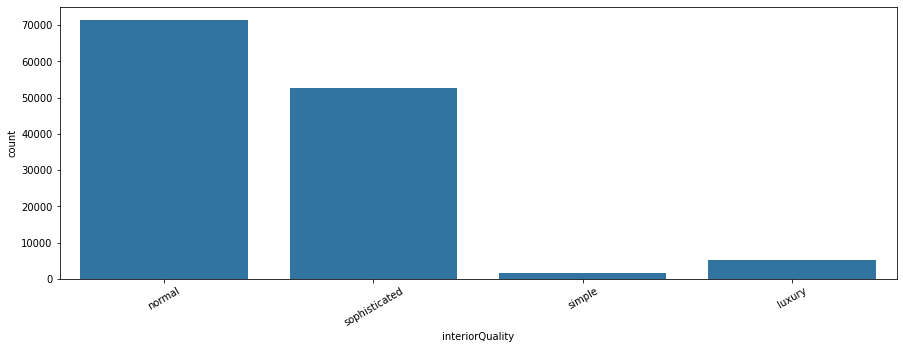

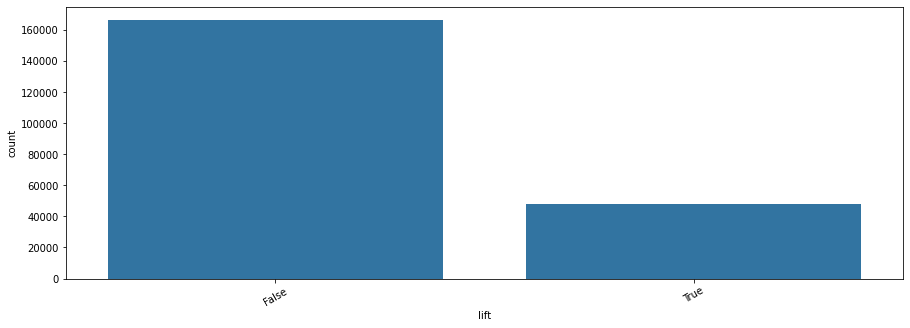

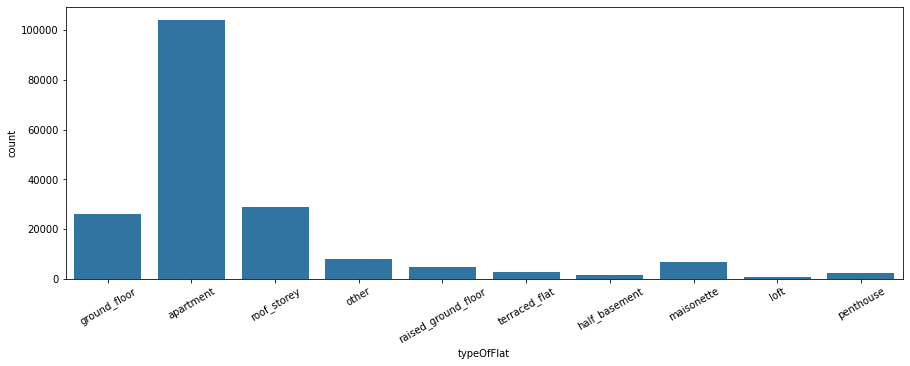

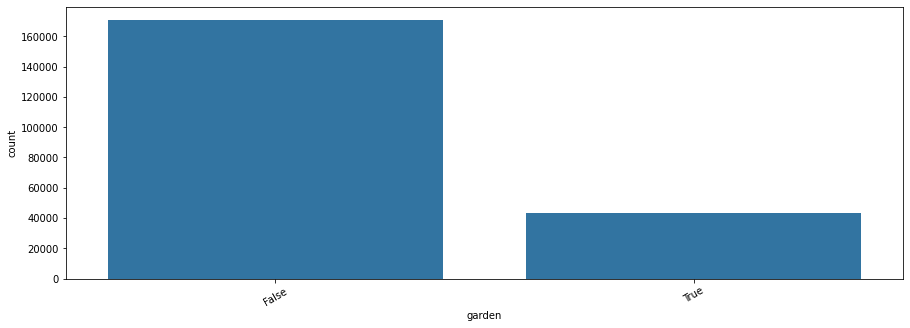

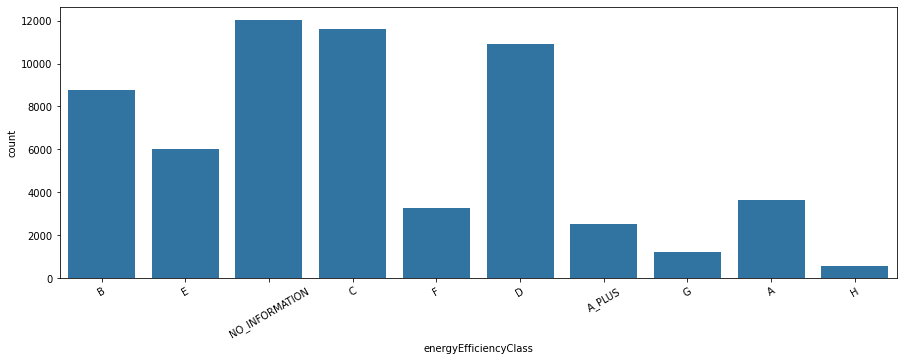

In [ ]:
# Create a loop to generate all the graphs

vars_of_interest = ['regionLevel1', 'heatingType', 'balcony', 
                    'kitchen', 'cellar', 
                    'condition', 'interiorQuality', 'lift', 'typeOfFlat', 
                    'garden', 'energyEfficiencyClass']

for var in vars_of_interest:
    plt.figure(figsize=[15,5])
    sns.countplot(data = df, x=var, color=base_color)
    plt.xticks(rotation=30)

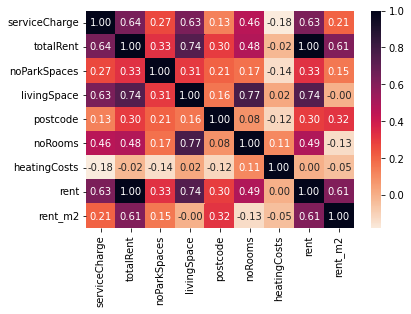

In [ ]:
# get the correlation coefficient of the response variable to each other variable

# get a list of all the nummerical variables
list_num_vars = list(df.select_dtypes(include=['float', 'int']).columns)

# generate a heatmpa
sns.heatmap(df[list_num_vars].corr(), cmap='rocket_r', annot=True, fmt='.2f')

- the negative correlation values between the rent/qm and other variables is clearly a fall of linear dependency.

- The number of rooms and the living space is clearly correlated - There might be a linear dependency, which has to be taken into account when fitting the linear model

let's see the if the relation between the variables looks linear



<Figure size 1080x1080 with 0 Axes>

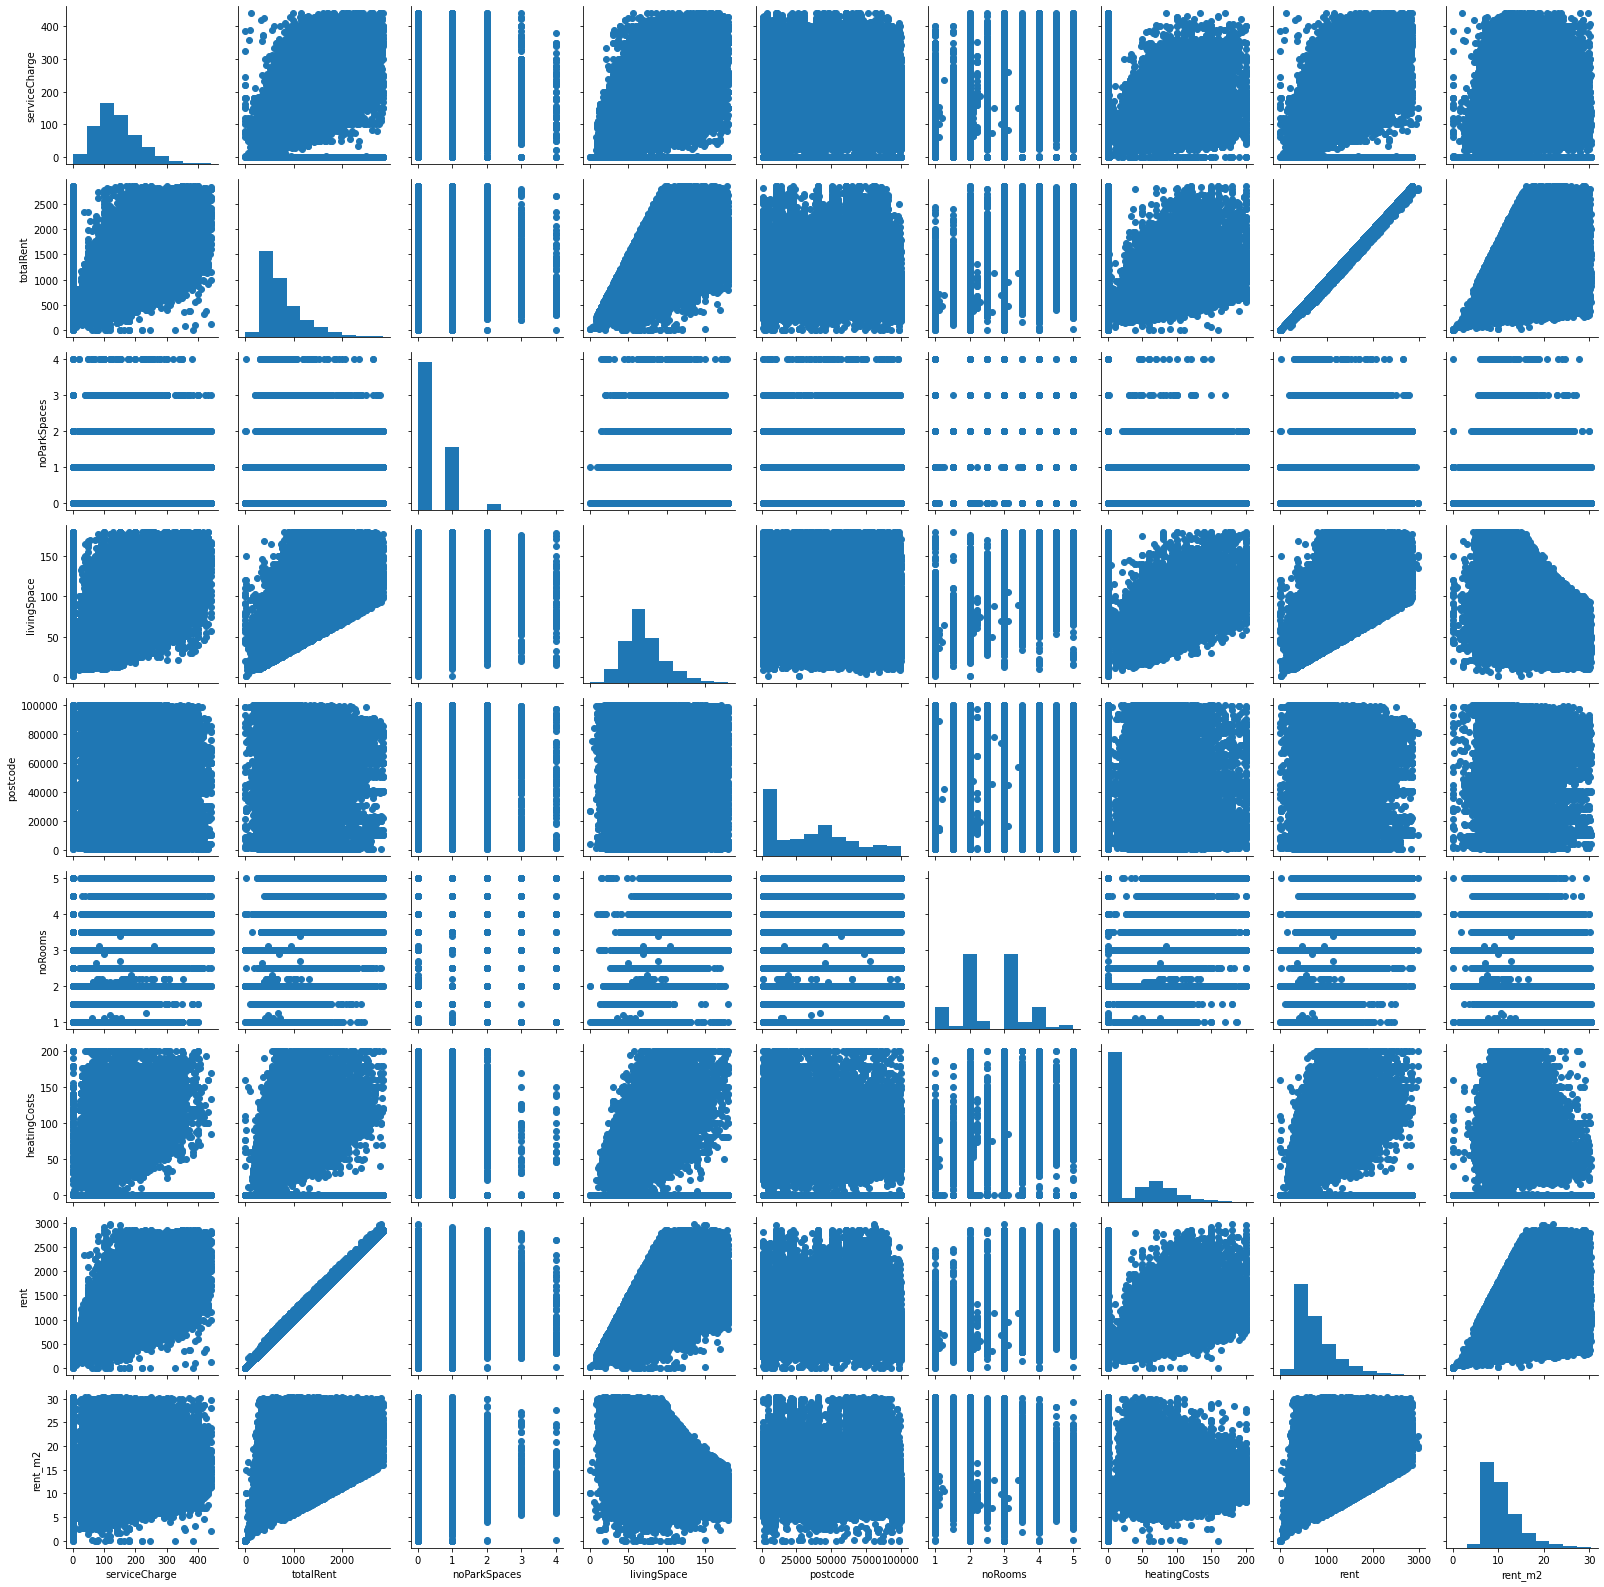

In [ ]:
# create a scatter matrix with the numerical variables
plt.figure(figsize=[15,15])
g = sns.PairGrid(data=df, vars=list_num_vars)
g = g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

## change all the ordered categorical variables to a categorical type
yearConstructed, lastRefurbish, energyEfficiencyClass

In [ ]:
yearCon_order = list(df.yearConstructed.value_counts().sort_index().index)
yearRef_order = list(df.yearConstructed.value_counts().sort_index().index)
energy_order = ['A_PLUS', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'NO_INFORMATION']

# create the categorical elements
ordered_yearCon = pd.api.types.CategoricalDtype(ordered=True, categories=yearCon_order)
ordered_yearRef = pd.api.types.CategoricalDtype(ordered=True, categories=yearRef_order)
ordered_energy = pd.api.types.CategoricalDtype(ordered=True, categories=energy_order)


In [ ]:

df = df.astype(
    {"yearConstructed": ordered_yearCon, 
     'lastRefurbish': ordered_yearRef, 
     'energyEfficiencyClass':ordered_energy
     }, errors='raise')


In [ ]:
# get rid of all years before 1900 as NO_INFORMATION

# create a mask for year constructed and last refurbish
mask = df['yearConstructed'] < '1900'
mask2 = df['lastRefurbish'] < '1900'

df.loc[mask, 'yearConstructed'] = 'NO_INFORMATION'
df.loc[mask2, 'lastRefurbish'] = 'NO_INFORMATION'

In [ ]:
# since the year of construction was already change to a category, I need to 
# update the category as well
yearCon_order = list(np.arange(1900, 2021, 1).astype(str))+ ['NO_INFORMATION']
yearRef_order = list(np.arange(1900, 2021, 1).astype(str))+ ['NO_INFORMATION']

# create the categorical elements
ordered_yearCon = pd.api.types.CategoricalDtype(ordered=True, categories=yearCon_order)
ordered_yearRef = pd.api.types.CategoricalDtype(ordered=True, categories=yearRef_order)

# change the data type to categories
df.yearConstructed = df.yearConstructed.astype(ordered_yearCon)
df.lastRefurbish = df.lastRefurbish.astype(ordered_yearRef)

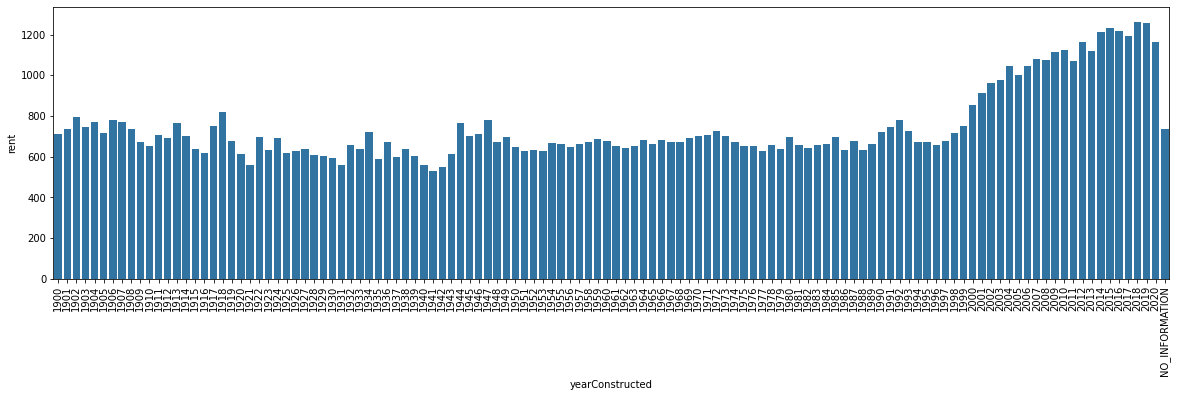

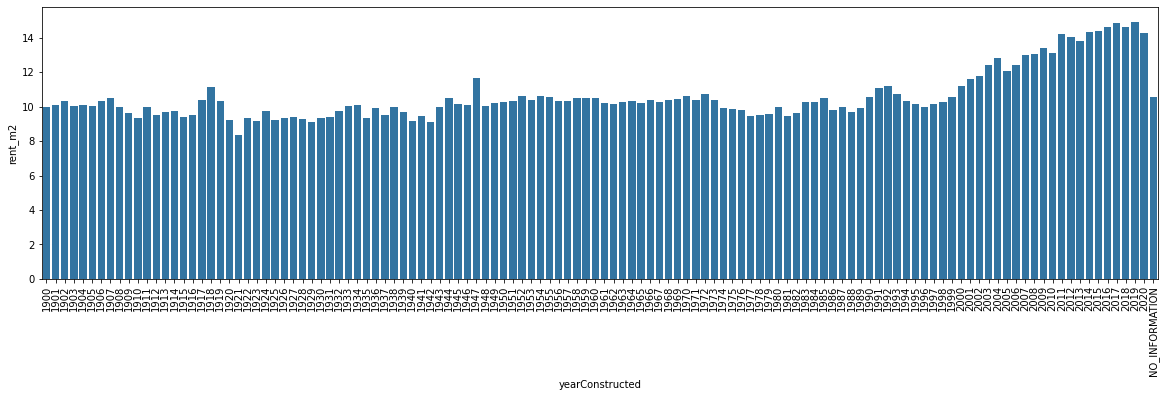

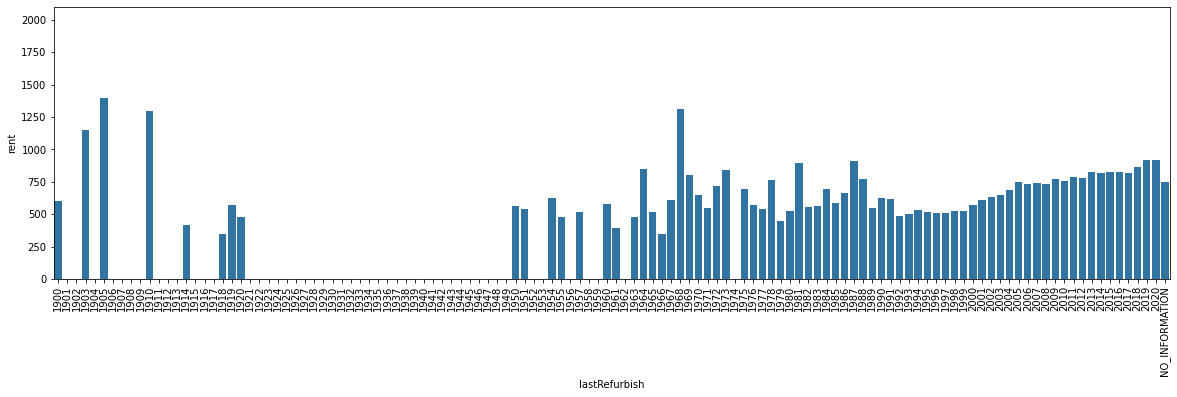

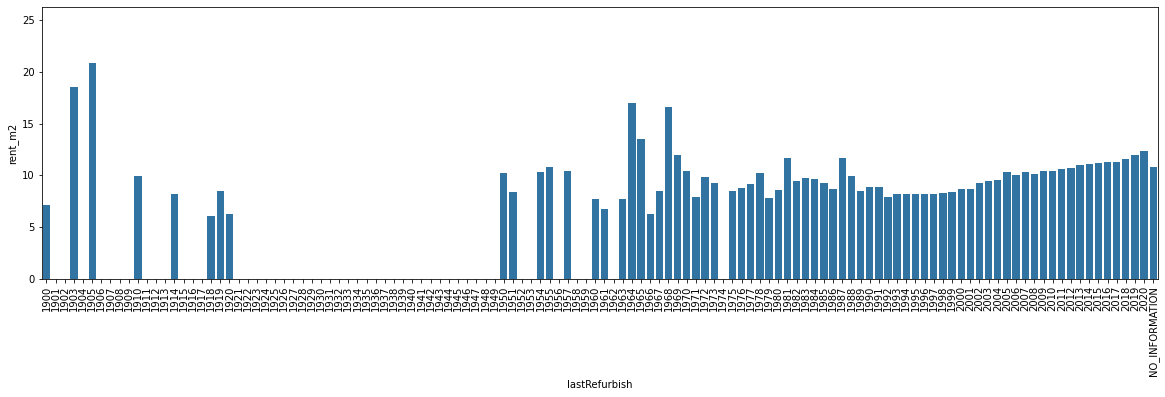

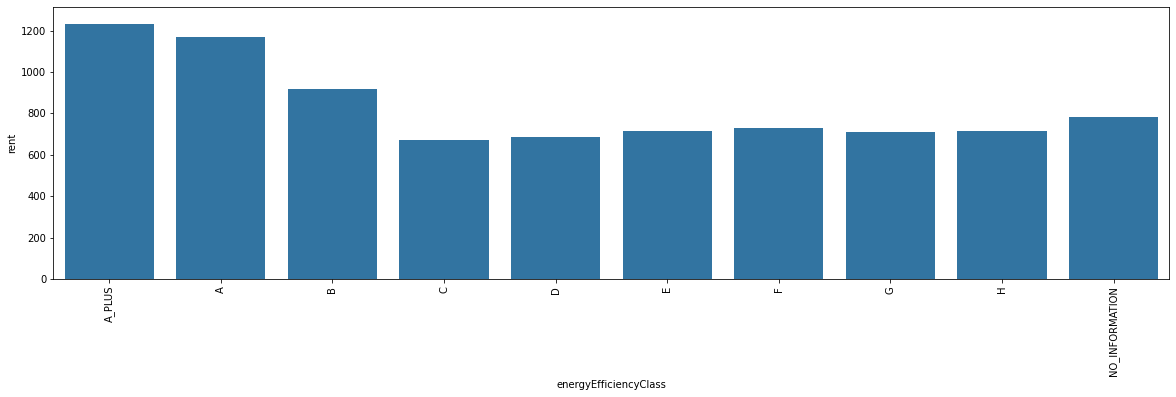

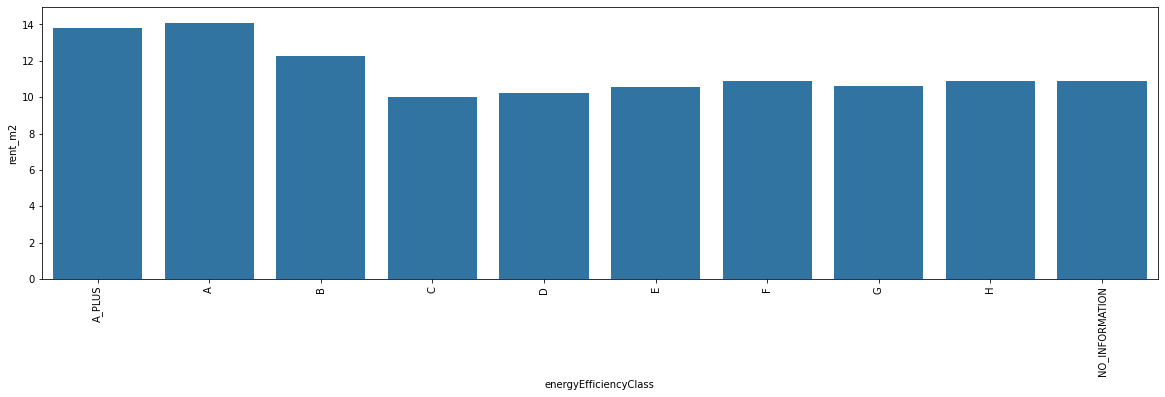

In [ ]:
 # create a barplot for each categorical value

list_cat_vars = ['yearConstructed', 'lastRefurbish', 'energyEfficiencyClass']
list_response_vars = ['rent', 'rent_m2']


for var in list_cat_vars:
    for rvar in list_response_vars:
        plt.figure(figsize=[20,5])
        sns.barplot(data=df, x=var, y=rvar, errwidth=0, color=base_color)
        plt.xticks(rotation=90)

- As expected there is a lot of variation in the response variable for flats constructed in the last 20 years. Before that it seems that the year does not really have an impact in the response variable (keeping all other variables constant).

- On the other hand the variable last refurbish does not make much sense, as there are some peaks for refurbish made 60 years ago. In contrast it can be expected, that the rent price increases as the time since the last refurbishment decreases.

- The variation in the energy class is very interesting as it seems that people are willing to pay a premium for the highest energy classes, but are indifferent to the class in the the lower classes-segment. The better the energy class the higher the rent price (keeping all other variables constant)

Lets take a look to all other variables

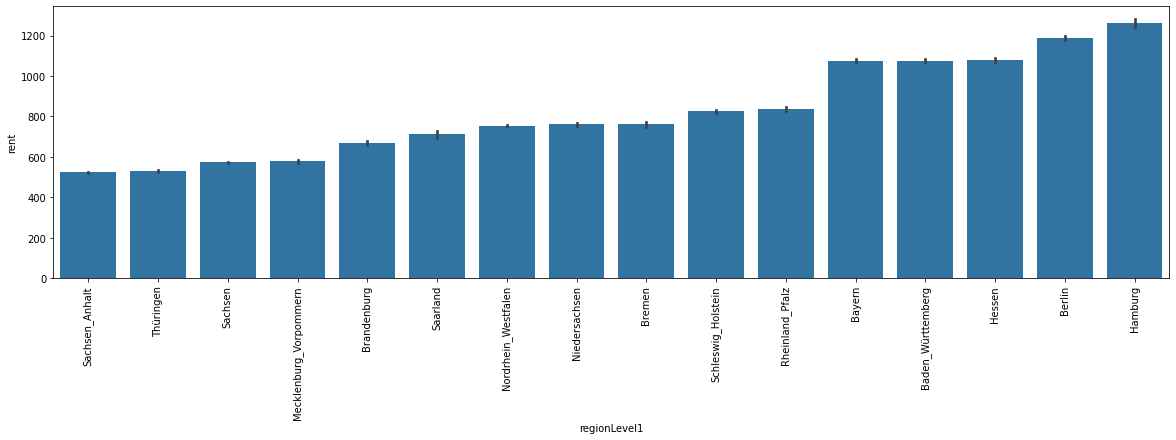

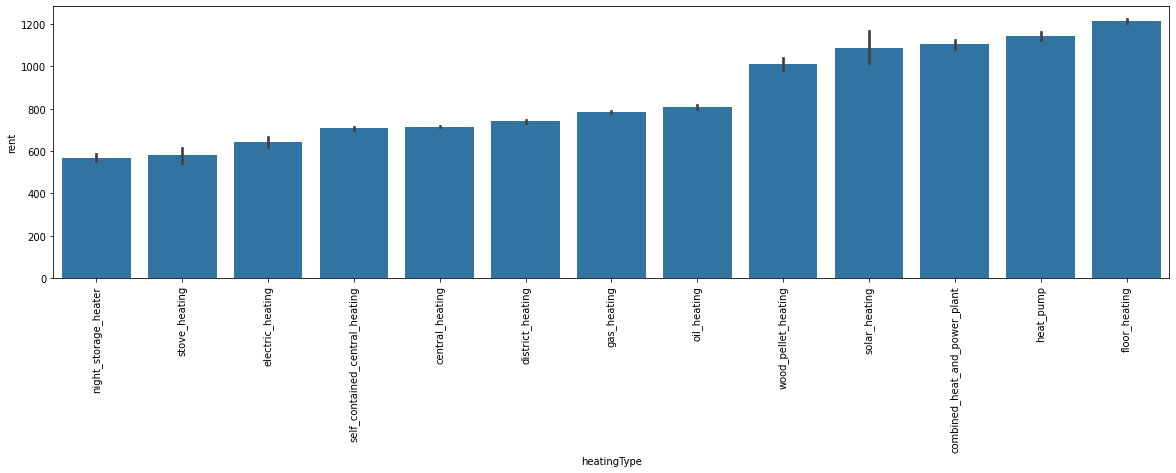

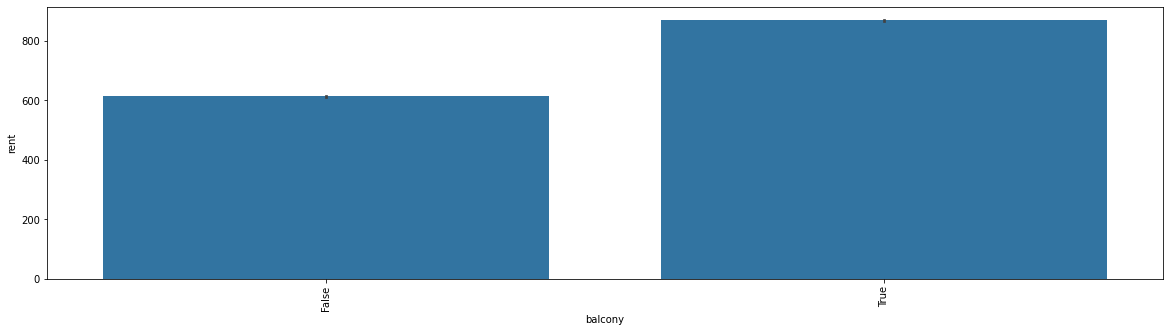

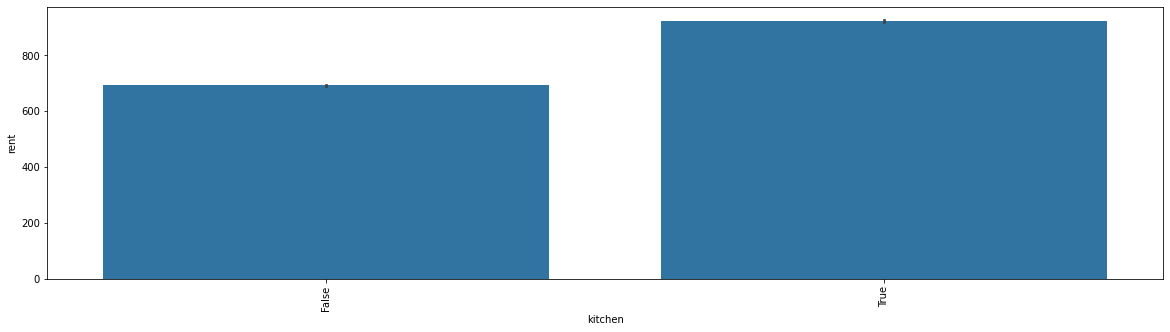

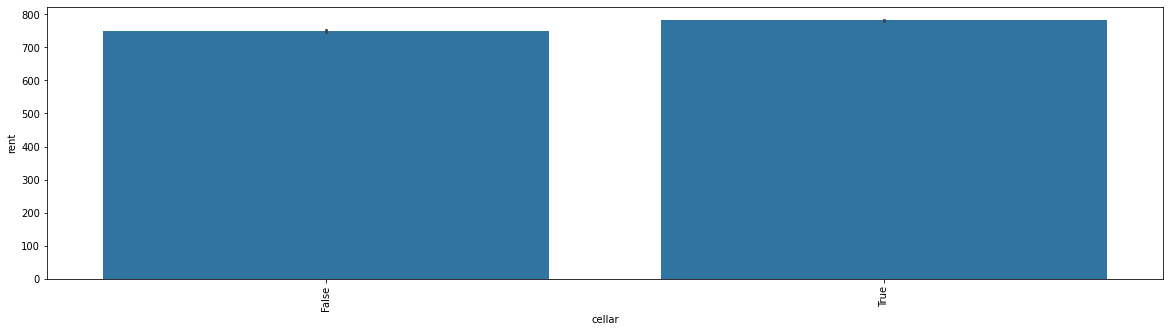

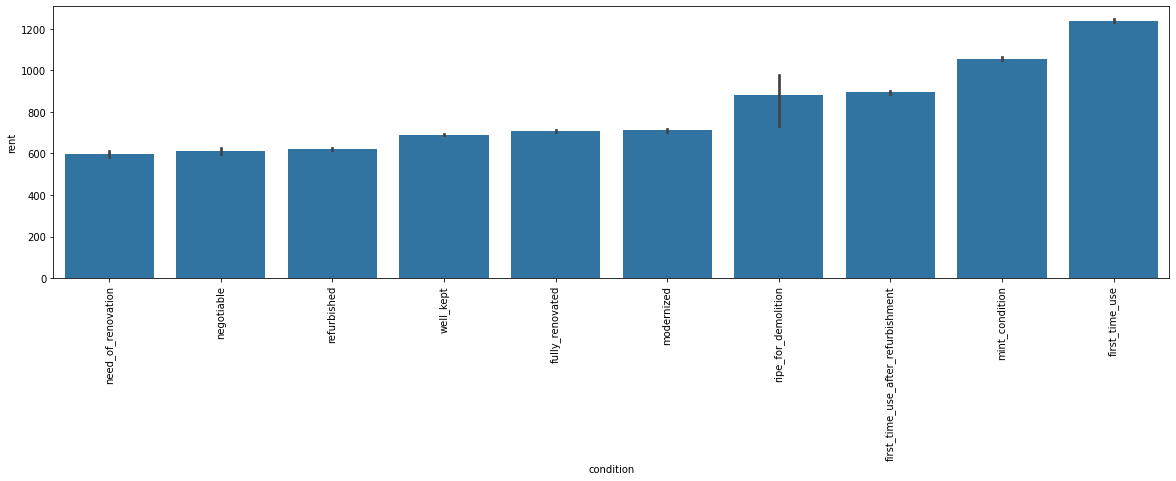

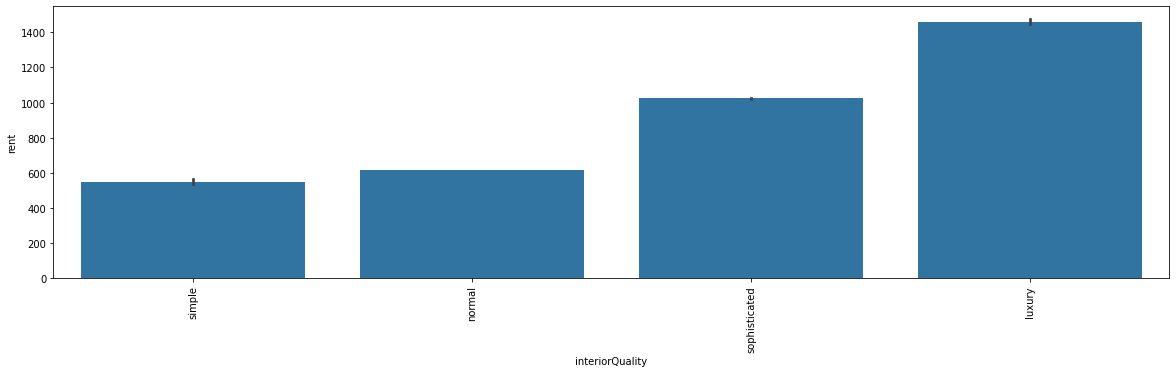

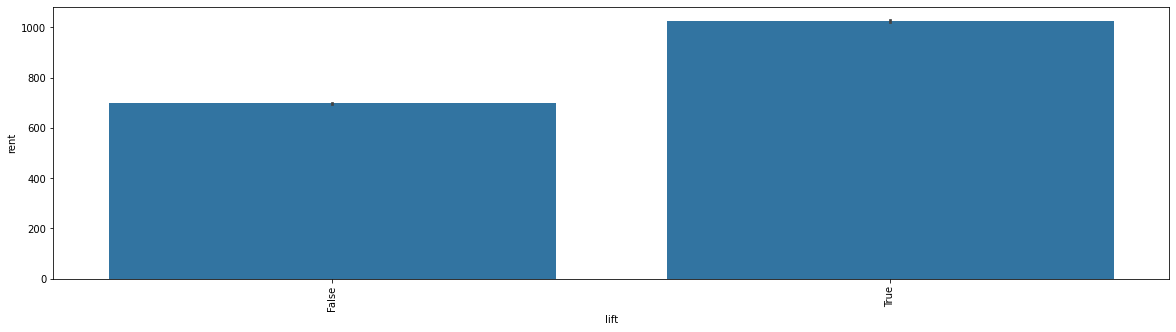

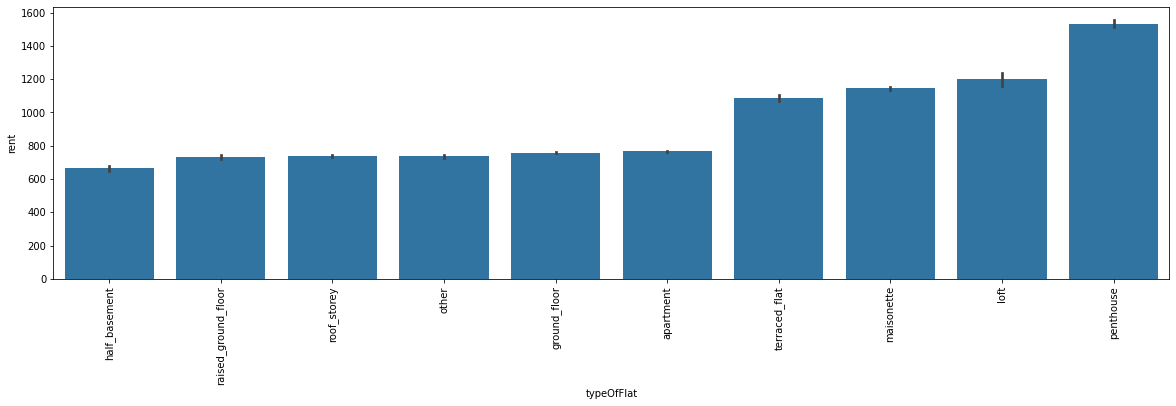

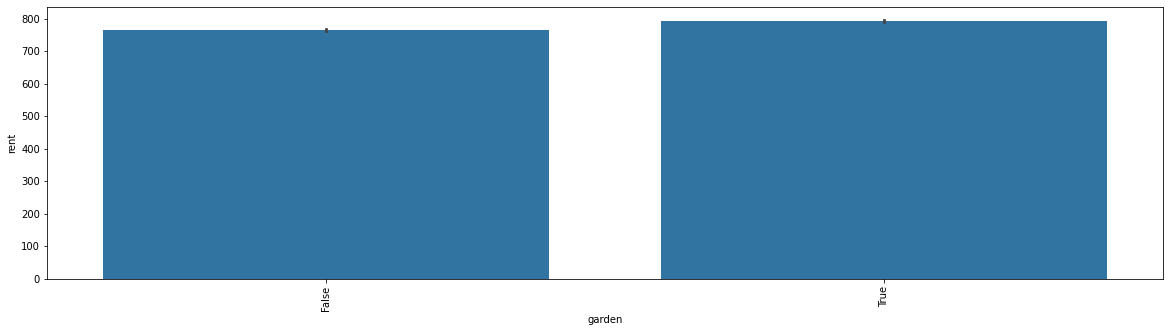

In [ ]:
vars_of_interest = ['regionLevel1', 'heatingType', 'balcony', 
                    'kitchen', 'cellar', 
                    'condition', 'interiorQuality', 'lift', 'typeOfFlat', 
                    'garden']

for var in vars_of_interest:
    result = list(df.groupby([var]).rent.mean().sort_values().index)
    plt.figure(figsize=[20,5])
    sns.barplot(data=df, x=var, y='rent', color=base_color, order=result)
    plt.xticks(rotation=90);